VÍ DỤ 1

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/iris (1).csv")

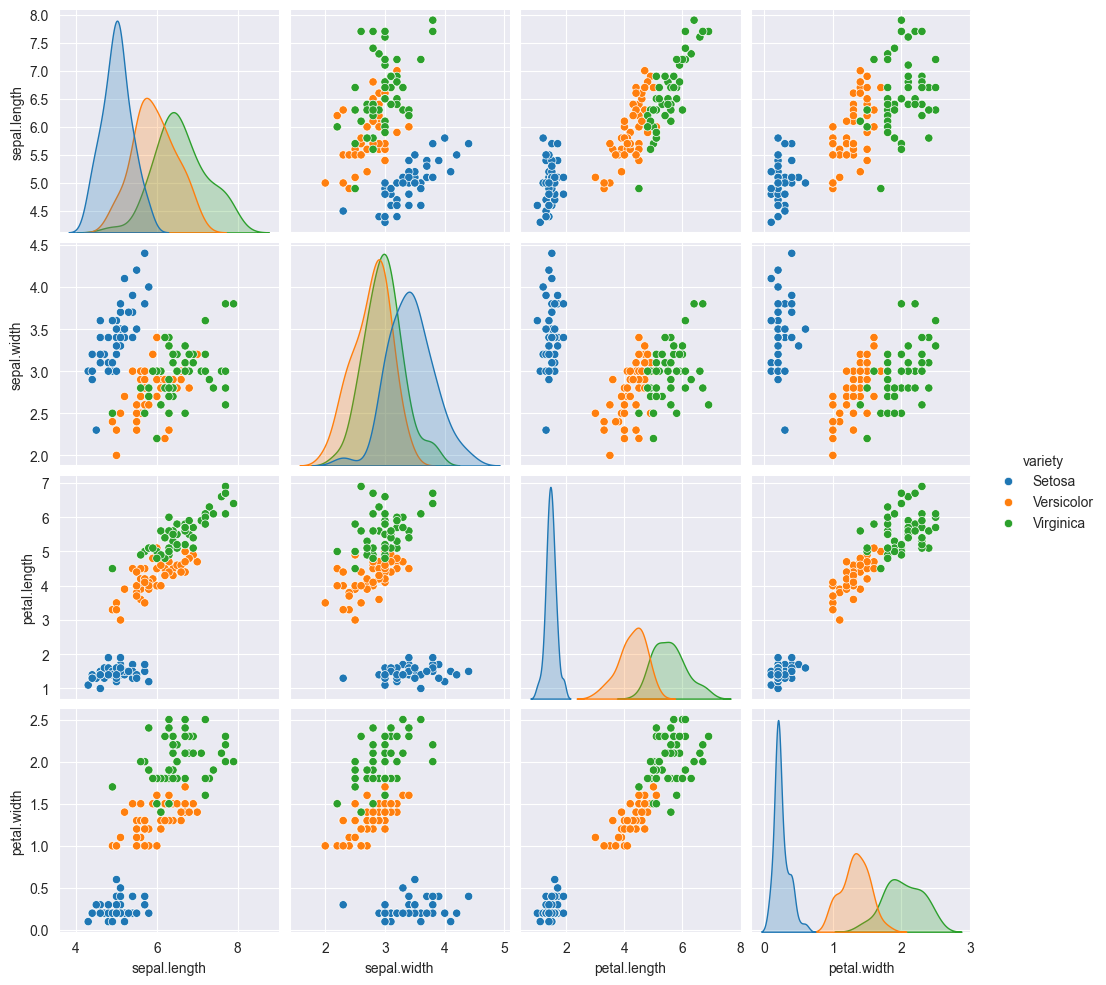

In [46]:
df
df.describe()
sns.pairplot(df, hue = 'variety')


Text(0.5, 1.0, 'Correlation matrix')

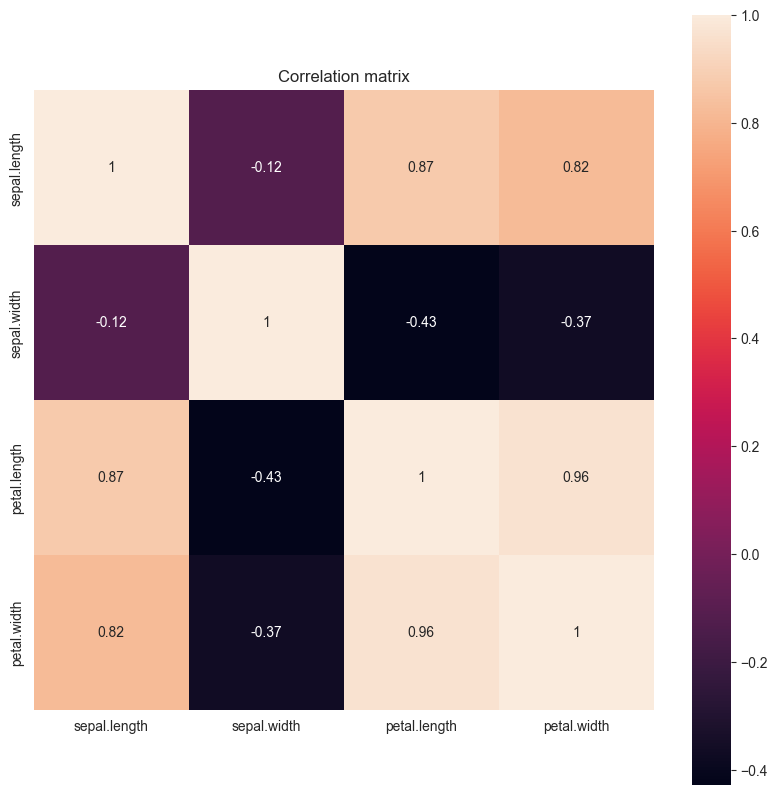

In [47]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", axis=1)

# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [48]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91849782, 0.91403047, 0.14675688, 0.02071484]), eigenvectors=array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

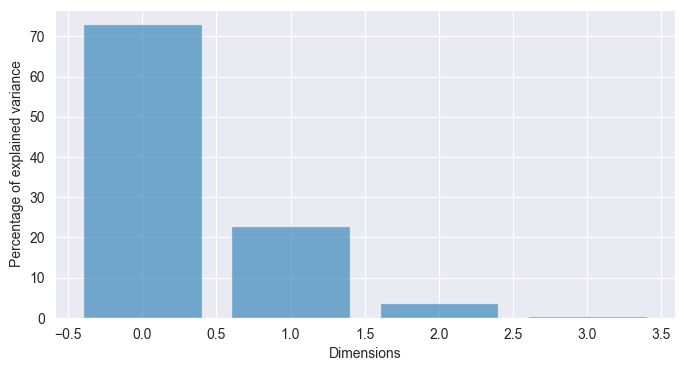

In [49]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [50]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

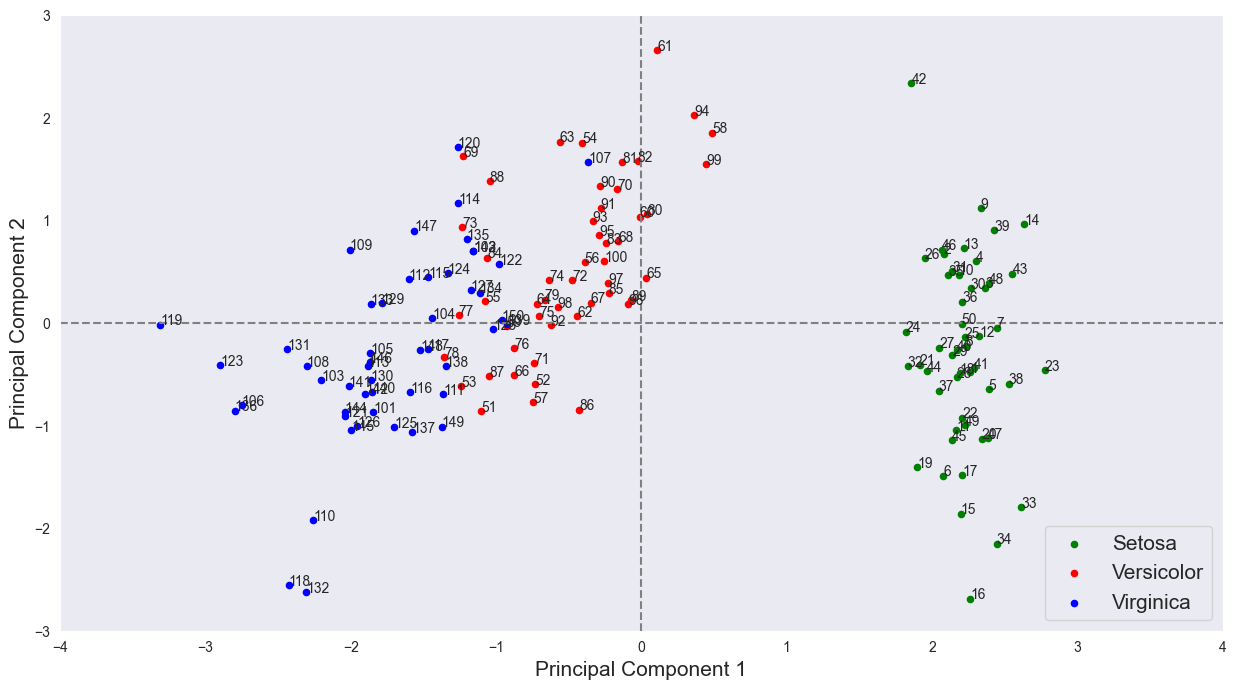

In [51]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)

YÊU CẦU THỰC HÀNH 

In [52]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/pd_speech_features.csv")

print("=== Thông tin dữ liệu ===")
print(df.info())
print("\n=== Mô tả thống kê ===")
print(df.describe())

=== Thông tin dữ liệu ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None

=== Mô tả thống kê ===
               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPu

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
Phần trăm phương sai được giải thích bởi từng thành phần 
PC1: 72.96%
PC2: 22.85%


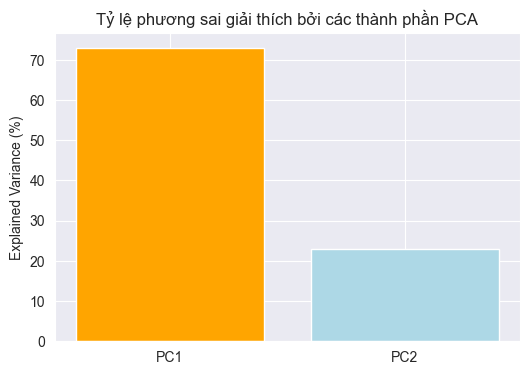

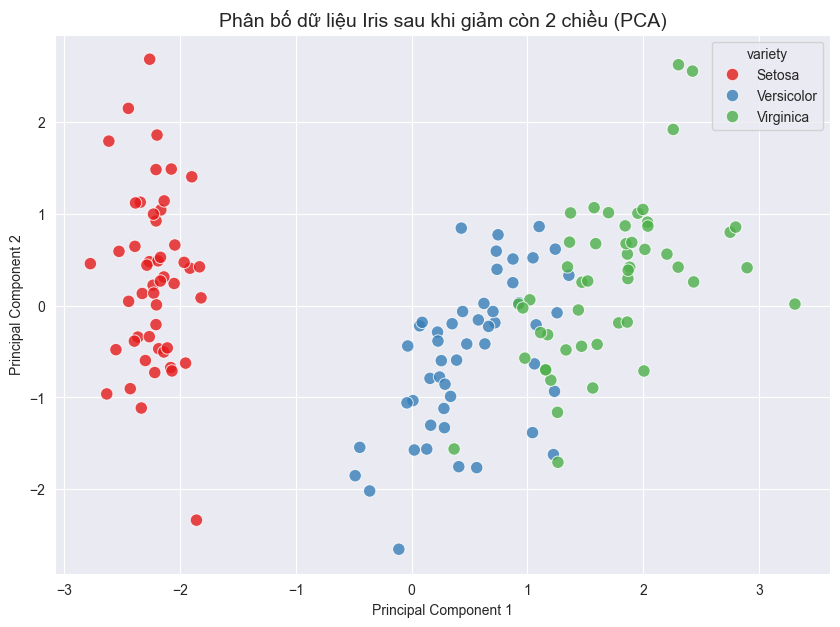

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Đọc file
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/iris (1).csv")

print(df.columns)

# Chỉ lấy các cột số
X = df.select_dtypes(include=[np.number])

# Xác định cột nhãn
if "Species" in df.columns:
    Y = df["Species"]
elif "variety" in df.columns:
    Y = df["variety"]
else:
    raise KeyError("Không tìm thấy cột nhãn trong dữ liệu")

# Chuẩn hoá dữ liệu
X_scaled = StandardScaler().fit_transform(X)

# Giảm chiều còn 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame chứa 2 thành phần chính
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['variety'] = Y

# Tỷ lệ phương sai
explained = pca.explained_variance_ratio_ * 100
print("Phần trăm phương sai được giải thích bởi từng thành phần ")
print(f"PC1: {explained[0]:.2f}%")
print(f"PC2: {explained[1]:.2f}%")

plt.figure(figsize=(6,4))
plt.bar(['PC1', 'PC2'], explained, color=['orange', 'lightblue'])
plt.ylabel('Explained Variance (%)')
plt.title('Tỷ lệ phương sai giải thích bởi các thành phần PCA')
plt.show()

# Vẽ kết quả PCA 2D
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='variety',
    data=pca_df,
    palette='Set1',
    s=80,
    alpha=0.8
)
plt.title('Phân bố dữ liệu Iris sau khi giảm còn 2 chiều (PCA)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Explained variance ratio (tỷ lệ phương sai): [0.72962445 0.22850762]
Tổng phương sai giải thích: 0.9581320720000163


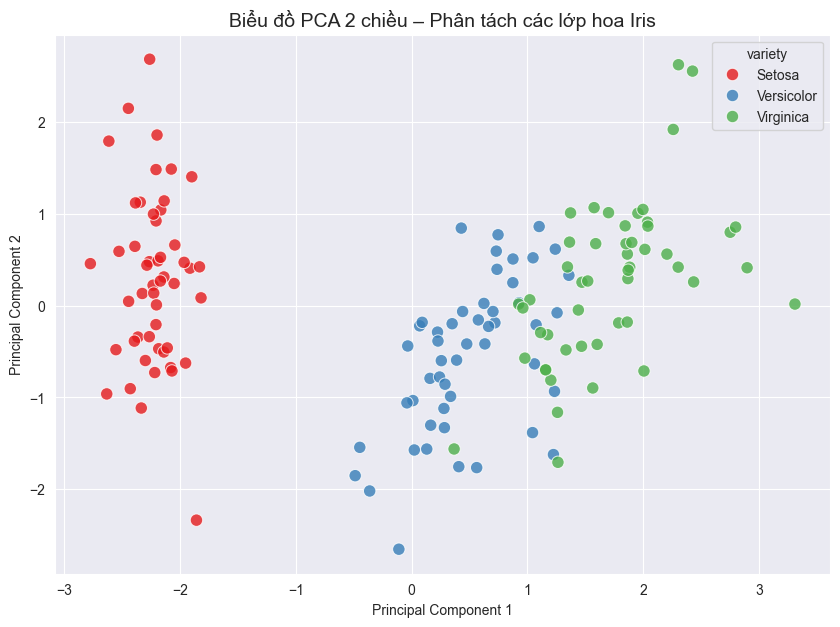

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu 
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/iris (1).csv")

# --- Tách phần dữ liệu và nhãn ---
X = df.drop("variety", axis=1)
y = df["variety"]

# --- Chuẩn hóa dữ liệu ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Giảm số chiều còn 2 bằng PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Tạo DataFrame mới chứa 2 thành phần chính ---
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['variety'] = y

# --- Hiển thị tỉ lệ phương sai được giải thích ---
print("Explained variance ratio (tỷ lệ phương sai):", pca.explained_variance_ratio_)
print("Tổng phương sai giải thích:", np.sum(pca.explained_variance_ratio_))

# --- Vẽ biểu đồ thể hiện mối quan hệ giữa các lớp ---
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='variety',
    data=pca_df,
    palette='Set1',
    s=80,
    alpha=0.8
)
plt.title("Biểu đồ PCA 2 chiều – Phân tách các lớp hoa Iris", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


2)

Trường hợp A – Dữ liệu nguyên bản (4 chiều)

 [A] Độ chính xác với dữ liệu gốc: 93.33%


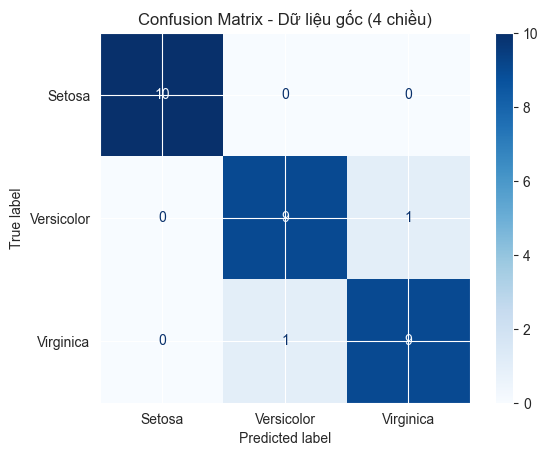

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/iris (1).csv")

label_col = 'Species' if 'Species' in df.columns else 'variety'
X = df.drop(columns=[label_col, 'Id'], errors='ignore')
y = df[label_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

acc_raw = accuracy_score(y_test, y_pred_raw)
print(f" [A] Độ chính xác với dữ liệu gốc: {acc_raw*100:.2f}%")

cm_raw = confusion_matrix(y_test, y_pred_raw)
ConfusionMatrixDisplay(cm_raw, display_labels=model_raw.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - Dữ liệu gốc (4 chiều)")
plt.show()


 [B-ii] PCA trước chia Train/Test – Accuracy: 90.00%


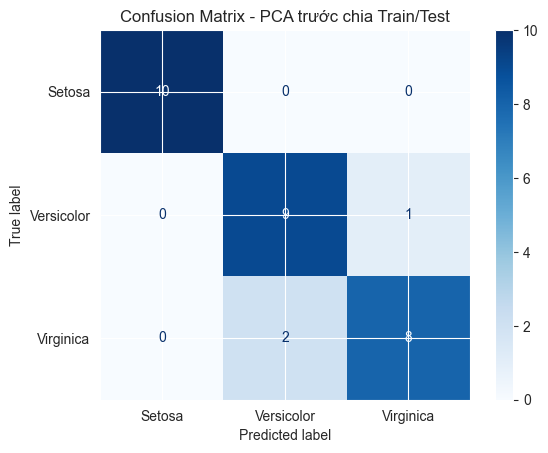

In [56]:

pca_ii = PCA(n_components=2)
X_pca_all = pca_ii.fit_transform(X_scaled)  
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_pca_all, y, test_size=0.2, stratify=y, random_state=42
)

model_pca_ii = LogisticRegression(max_iter=1000)
model_pca_ii.fit(X_train2, y_train2)
y_pred_pca_ii = model_pca_ii.predict(X_test2)

acc_pca_ii = accuracy_score(y_test2, y_pred_pca_ii)
print(f" [B-ii] PCA trước chia Train/Test – Accuracy: {acc_pca_ii*100:.2f}%")

cm_pca_ii = confusion_matrix(y_test2, y_pred_pca_ii)
ConfusionMatrixDisplay(cm_pca_ii, display_labels=model_pca_ii.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix - PCA trước chia Train/Test")
plt.show()


In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/iris (1).csv")

# Lấy cột nhãn
if "Species" in df.columns:
    y = df["Species"]
elif "variety" in df.columns:
    y = df["variety"]
else:
    raise KeyError("Không tìm thấy cột nhãn Species hoặc variety")

X = df.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred_raw = model.predict(X_test_scaled)
acc_raw = accuracy_score(y_test, y_pred_raw)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca_i = LogisticRegression(max_iter=500)
model_pca_i.fit(X_train_pca, y_train)
y_pred_pca_i = model_pca_i.predict(X_test_pca)
acc_pca_i = accuracy_score(y_test, y_pred_pca_i)

X_scaled_all = StandardScaler().fit_transform(X)
X_pca_all = PCA(n_components=2).fit_transform(X_scaled_all)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca_all, y, test_size=0.2, stratify=y, random_state=42)

model_pca_ii = LogisticRegression(max_iter=500)
model_pca_ii.fit(X_train2, y_train2)
y_pred_pca_ii = model_pca_ii.predict(X_test2)
acc_pca_ii = accuracy_score(y_test2, y_pred_pca_ii)

# ===== SO SÁNH =====
print("\n=== So sánh độ chính xác giữa các trường hợp ===")
print(f"Dữ liệu nguyên bản (A):       {acc_raw:.3f}")
print(f"Giảm chiều (B.i) - sau khi chia: {acc_pca_i:.3f}")
print(f"Giảm chiều (B.ii) - trước khi chia: {acc_pca_ii:.3f}")





=== So sánh độ chính xác giữa các trường hợp ===
Dữ liệu nguyên bản (A):       0.933
Giảm chiều (B.i) - sau khi chia: 0.900
Giảm chiều (B.ii) - trước khi chia: 0.900


VÍ DỤ 2: (THỰC HÀNH 1)


In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/pd_speech_features.csv")
df.head()
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

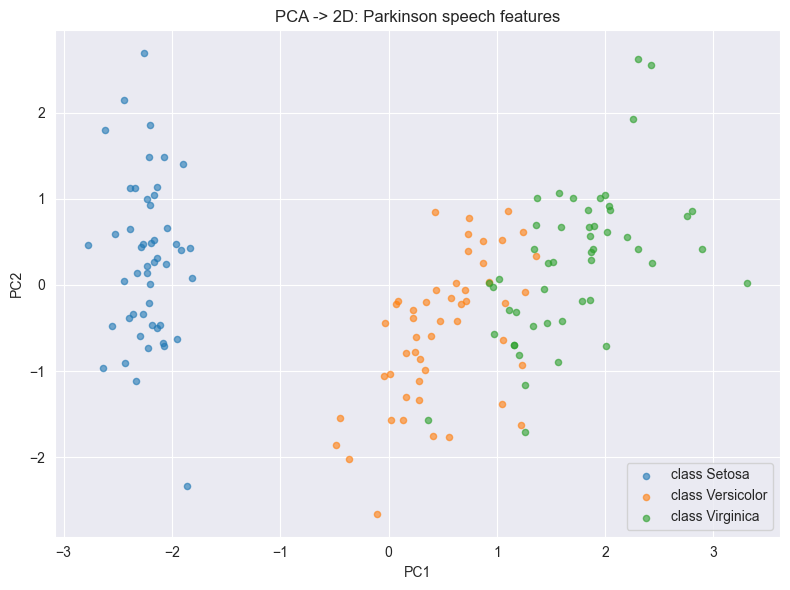

In [59]:
# 1) Giảm xuống 2 chiều và vẽ scatter
pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    idx = (y == label)
    plt.scatter(X2[idx,0], X2[idx,1], label=f"class {label}", alpha=0.6, s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA -> 2D: Parkinson speech features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/pd_speech_features.csv")

# Tách X, y
X = df.drop('class', axis=1)
y = df['class']

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA trên toàn bộ dữ liệu
pca_full_then_split = PCA(n_components=200, random_state=42, svd_solver='auto')
X_200_full = pca_full_then_split.fit_transform(X_scaled)

print(f"Explained variance ratio (first 200) sum = {pca_full_then_split.explained_variance_ratio_.sum():.4f}")

# Chia train/test (500 mẫu train)
X_train_2a, X_test_2a, y_train_2a, y_test_2a = train_test_split(
    X_200_full, y, train_size=500, random_state=42, stratify=y)

# Huấn luyện Logistic Regression
clf_lr_2a = LogisticRegression(max_iter=1000, random_state=42)
clf_lr_2a.fit(X_train_2a, y_train_2a)
y_pred_lr_2a = clf_lr_2a.predict(X_test_2a)

# Độ chính xác
acc_lr_2a = accuracy_score(y_test_2a, y_pred_lr_2a)
print("2) (PCA fit on ALL -> 200) LogisticRegression accuracy:", acc_lr_2a)


Explained variance ratio (first 200) sum = 0.9684
2) (PCA fit on ALL -> 200) LogisticRegression accuracy: 0.81640625


In [61]:
# Số chiều sau khi giảm
n_comp = 200

# Chia dữ liệu trước
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_scaled, y, train_size=500, random_state=42, stratify=y)

# Fit PCA trên train, transform cả train và test
pca_train_then_transform = PCA(n_components=n_comp, random_state=42)
X_train_200 = pca_train_then_transform.fit_transform(X_train_3)
X_test_200 = pca_train_then_transform.transform(X_test_3)

print("Explained variance (train-fit) sum (200 comps) =",
      pca_train_then_transform.explained_variance_ratio_.sum())

# Huấn luyện Logistic Regression
clf_lr_3 = LogisticRegression(max_iter=1000, random_state=42)
clf_lr_3.fit(X_train_200, y_train_3)

# Dự đoán và đánh giá
y_pred_lr_3 = clf_lr_3.predict(X_test_200)
acc_lr_3 = accuracy_score(y_test_3, y_pred_lr_3)
print("3) (Split then PCA on TRAIN -> 200) LogisticRegression accuracy:", acc_lr_3)


Explained variance (train-fit) sum (200 comps) = 0.9802852496537877
3) (Split then PCA on TRAIN -> 200) LogisticRegression accuracy: 0.82421875


4.i) Số chiều nhỏ nhất để giữ >=80% phương sai: 61


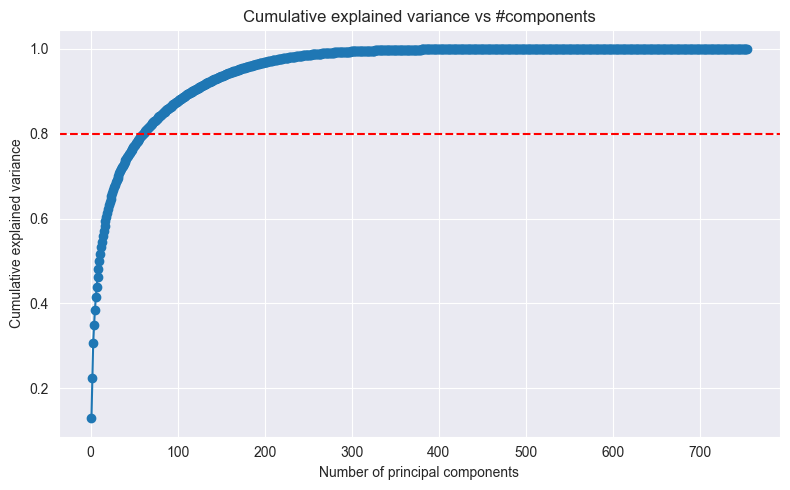

4.ii) LogisticRegression on PCA(>=80%) accuracy: 0.81640625


In [62]:
# 4) Tìm số chiều nhỏ nhất giữ >= 80% phương sai
# ---------------------------
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_scaled)
cumvar = np.cumsum(pca_full.explained_variance_ratio_)
# tìm số chiều tối thiểu
n_comp_80 = np.searchsorted(cumvar, 0.80) + 1  # +1 vì index từ 0
print(f"4.i) Số chiều nhỏ nhất để giữ >=80% phương sai: {n_comp_80}")

# Vẽ biểu đồ scree (tỉ lệ phương sai tích lũy)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(cumvar)+1), cumvar, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance vs #components")
plt.grid(True)
plt.tight_layout()
plt.show()

# Giảm sang số chiều này và chạy classification (chia train_size=500 stratified)
pca_80 = PCA(n_components=n_comp_80, random_state=42)
X_80 = pca_80.fit_transform(X_scaled)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_80, y, train_size=500, random_state=42, stratify=y)

clf_lr_4 = LogisticRegression(max_iter=1000, random_state=42)
clf_lr_4.fit(X_train_4, y_train_4)
acc_lr_4 = accuracy_score(y_test_4, clf_lr_4.predict(X_test_4))
print("4.ii) LogisticRegression on PCA(>=80%) accuracy:", acc_lr_4)



5) Trên dữ liệu gốc (4:2):
 GaussianNB accuracy: 0.7658730158730159
 LogisticRegression accuracy: 0.8373015873015873

5) Trên dữ liệu giảm chiều (>=80%) (4:2):
 GaussianNB accuracy: 0.7579365079365079
 LogisticRegression accuracy: 0.8333333333333334

Thay đổi accuracy sau khi giảm chiều:
 GaussianNB: Δ = -0.0079
 LogisticRegression: Δ = -0.0040

Chi tiết (confusion matrix & classification report) - Logistic on reduced data (5b):
[[ 42  22]
 [ 20 168]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        64
           1       0.88      0.89      0.89       188

    accuracy                           0.83       252
   macro avg       0.78      0.77      0.78       252
weighted avg       0.83      0.83      0.83       252


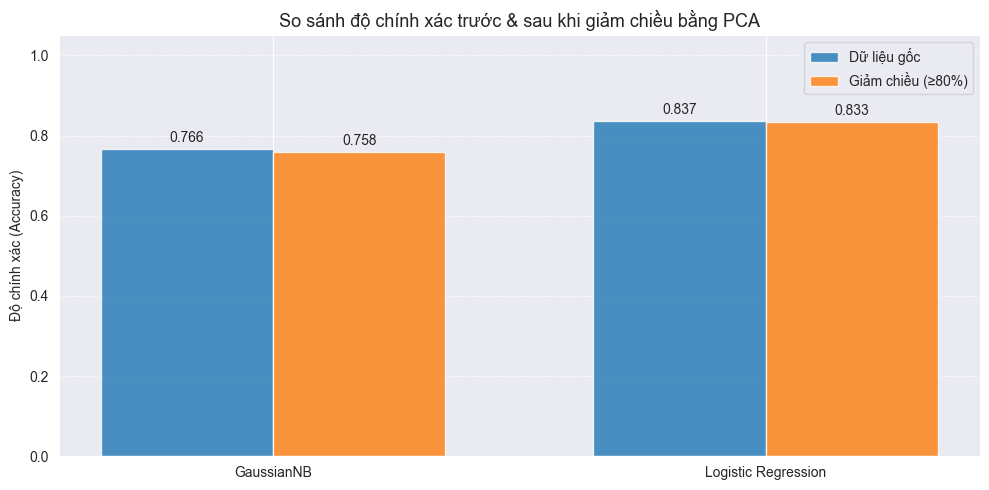

In [63]:

# 5) Chia 4:2 (tỷ lệ 4:2 -> tương đương 2/3 train, 1/3 test)
#    a) Trên dữ liệu gốc (chuẩn hóa)
#    b) Trên dữ liệu đã giảm chiều ở (4) (n_comp_80)


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Nếu bạn chưa định nghĩa n_comp_80 ở bước (4), hãy thêm dòng này:
# n_comp_80 = pca_80.n_components_  # số chiều giữ lại >= 80% phương sai
# Chia dữ liệu train:test = 4:2 (tức test_size = 1/3)
test_size = 1.0 / 3.0
X_train_5a, X_test_5a, y_train_5a, y_test_5a = train_test_split(
    X_scaled, y, test_size=test_size, random_state=42, stratify=y
)

#a) Trên dữ liệu gốc 
gnb_orig = GaussianNB()
lr_orig = LogisticRegression(max_iter=1000, random_state=42)

gnb_orig.fit(X_train_5a, y_train_5a)
lr_orig.fit(X_train_5a, y_train_5a)

acc_gnb_orig = accuracy_score(y_test_5a, gnb_orig.predict(X_test_5a))
acc_lr_orig = accuracy_score(y_test_5a, lr_orig.predict(X_test_5a))

print("\n5) Trên dữ liệu gốc (4:2):")
print(" GaussianNB accuracy:", acc_gnb_orig)
print(" LogisticRegression accuracy:", acc_lr_orig)

# b) Trên dữ liệu giảm chiều (giữ >= 80% phương sai) 
pca_5 = PCA(n_components=n_comp_80, random_state=42)
X_train_5b = pca_5.fit_transform(X_train_5a)
X_test_5b = pca_5.transform(X_test_5a)

gnb_red = GaussianNB()
lr_red = LogisticRegression(max_iter=1000, random_state=42)

gnb_red.fit(X_train_5b, y_train_5a)
lr_red.fit(X_train_5b, y_train_5a)

acc_gnb_red = accuracy_score(y_test_5a, gnb_red.predict(X_test_5b))
acc_lr_red = accuracy_score(y_test_5a, lr_red.predict(X_test_5b))

print("\n5) Trên dữ liệu giảm chiều (>=80%) (4:2):")
print(" GaussianNB accuracy:", acc_gnb_red)
print(" LogisticRegression accuracy:", acc_lr_red)

# So sánh thay đổi accuracy
change_gnb = acc_gnb_red - acc_gnb_orig
change_lr = acc_lr_red - acc_lr_orig

print("\nThay đổi accuracy sau khi giảm chiều:")
print(f" GaussianNB: Δ = {change_gnb:.4f}")
print(f" LogisticRegression: Δ = {change_lr:.4f}")

# In báo cáo chi tiết cho Logistic Regression (b) 
print("\nChi tiết (confusion matrix & classification report) - Logistic on reduced data (5b):")
print(confusion_matrix(y_test_5a, lr_red.predict(X_test_5b)))
print(classification_report(y_test_5a, lr_red.predict(X_test_5b)))

#  Vẽ biểu đồ so sánh accuracy 
models = ['GaussianNB', 'Logistic Regression']
acc_orig = [acc_gnb_orig, acc_lr_orig]
acc_red = [acc_gnb_red, acc_lr_red]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,5))
bars1 = plt.bar(x - width/2, acc_orig, width, label='Dữ liệu gốc', alpha=0.8)
bars2 = plt.bar(x + width/2, acc_red, width, label='Giảm chiều (≥80%)', alpha=0.8)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                 f"{height:.3f}", ha='center', va='bottom', fontsize=10)

plt.title("So sánh độ chính xác trước & sau khi giảm chiều bằng PCA", fontsize=13)
plt.ylabel("Độ chính xác (Accuracy)")
plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


VÍ DỤ 3 (BÀI TẬP TỰ THỰC HÀNH)

1. Giảm số chiều dữ liệu về 2 chiều và hiển thị trực quan

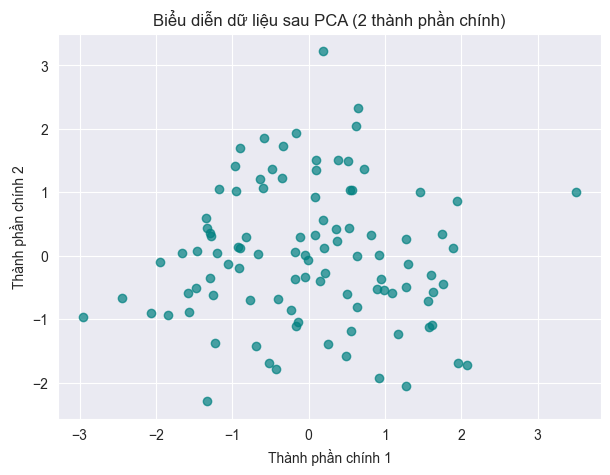

 KẾT QUẢ SO SÁNH 
➡ Dữ liệu gốc (5 biến): R² = 0.2085, MSE = 0.1278
➡ Sau PCA (2 chiều):   R² = 0.1665, MSE = 0.1346
 Tỷ lệ phương sai giữ lại sau PCA: 49.27%
 Sau PCA, độ chính xác giảm nhẹ do mất thông tin khi giảm chiều.
 PCA giúp giảm nhiễu, trực quan hóa dữ liệu dễ hơn, nhưng hồi quy tuyến tính với dữ liệu gốc vẫn cho độ chính xác cao hơn.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1️⃣ Đọc dữ liệu
file_path = "/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/vidu4_lin_reg (1).txt"
data = pd.read_csv(file_path, delim_whitespace=True)

# 2️⃣ Chọn biến đầu vào và đầu ra
X = data[['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']]
y = data['BEDAYNTM']

# 3️⃣ Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Giảm chiều về 2 bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5️⃣ Biểu diễn dữ liệu sau PCA
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], color='teal', alpha=0.7)
plt.title("Biểu diễn dữ liệu sau PCA (2 thành phần chính)")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.grid(True)
plt.show()

# 6️⃣ Mô hình hồi quy tuyến tính trên dữ liệu gốc (đã chuẩn hóa)
reg_orig = LinearRegression().fit(X_scaled, y)
y_pred_orig = reg_orig.predict(X_scaled)
r2_orig = reg_orig.score(X_scaled, y)
mse_orig = mean_squared_error(y, y_pred_orig)

# 7️⃣ Mô hình hồi quy tuyến tính trên dữ liệu sau PCA
reg_pca = LinearRegression().fit(X_pca, y)
y_pred_pca = reg_pca.predict(X_pca)
r2_pca = reg_pca.score(X_pca, y)
mse_pca = mean_squared_error(y, y_pred_pca)

# 8️⃣ So sánh kết quả
print(" KẾT QUẢ SO SÁNH ")
print(f"➡ Dữ liệu gốc (5 biến): R² = {r2_orig:.4f}, MSE = {mse_orig:.4f}")
print(f"➡ Sau PCA (2 chiều):   R² = {r2_pca:.4f}, MSE = {mse_pca:.4f}")
print(f" Tỷ lệ phương sai giữ lại sau PCA: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# 9️⃣ Nhận xét tự động
if r2_pca < r2_orig:
    print(" Sau PCA, độ chính xác giảm nhẹ do mất thông tin khi giảm chiều.")
else:
    print(" Sau PCA, mô hình vẫn giữ được hiệu quả tương đương hoặc tốt hơn.")

print(" PCA giúp giảm nhiễu, trực quan hóa dữ liệu dễ hơn, "
      "nhưng hồi quy tuyến tính với dữ liệu gốc vẫn cho độ chính xác cao hơn.")


VÍ DỤ 4 (BÀI TẬP THỰC HÀNH 3)

In [65]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# set names to the paths because they're too long
data_path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

print("(1) Đọc dữ liệu ảnh, lấy tập dữ liệu 5000 ảnh bất kỳ; giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu)")

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Gọi phương thức đọc dữ liệu
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

print("Kích thước ban đầu:")
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

pca = PCA(n_components=100)
train_images_pca = pca.fit_transform(train_images)
test_images_pca = pca.transform(test_images)

# In kích thước sau khi giảm chiều
print("\nKích thước sau khi giảm chiều xuống 100:")
print("Train images PCA shape:", train_images_pca.shape)
print("Test images PCA shape:", test_images_pca.shape)

# In tỷ lệ phương sai giải thích
print("\nTỷ lệ phương sai giải thích bởi 100 thành phần chính:")
print(pca.explained_variance_ratio_)
print(f"Tổng tỷ lệ phương sai giải thích: {round(sum(pca.explained_variance_ratio_)*100,2)}%")

(1) Đọc dữ liệu ảnh, lấy tập dữ liệu 5000 ảnh bất kỳ; giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu)
Kích thước ban đầu:
Train images shape: (5000, 784)
Train labels shape: (5000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)

Kích thước sau khi giảm chiều xuống 100:
Train images PCA shape: (5000, 100)
Test images PCA shape: (10000, 100)

Tỷ lệ phương sai giải thích bởi 100 thành phần chính:
[0.09658243 0.07173684 0.06391682 0.05310942 0.04896342 0.0431796
 0.03286644 0.02891151 0.02720083 0.02347474 0.02099963 0.01988385
 0.01781517 0.01698395 0.01546201 0.01508306 0.01337688 0.01263539
 0.01202953 0.01160502 0.01111983 0.01046779 0.00957147 0.00915514
 0.00862596 0.00816747 0.00805936 0.00790543 0.00732005 0.00691963
 0.00666028 0.00655454 0.00614616 0.00590083 0.00576454 0.00555176
 0.00517341 0.00495276 0.0049141  0.00461414 0.00453576 0.00441097
 0.00423669 0.00409455 0.00387335 0.00371573 0.00365691 0.00349051
 0.00342088 0.00332958 0.0032

(2) Áp dụng phương pháp phân loại nhiều lớp Multinomial Logistic Regression (tỷ lệ train:validation là 0.7:0.3).
(a) Dữ liệu nguyên bản (giữ nguyên 28x28 = 784 chiều)

Confusion Matrix:


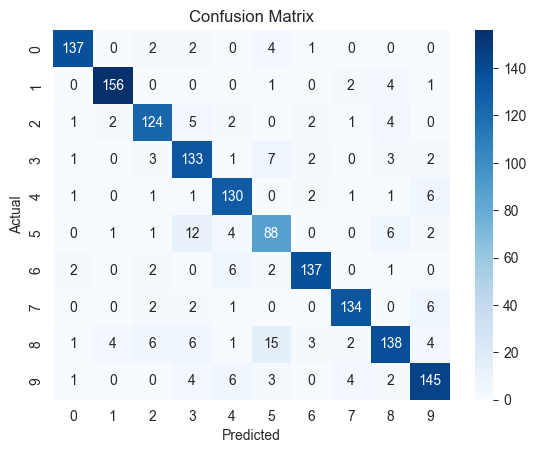

Độ chính xác trên tập train (original): 1.0000
Độ chính xác trên tập validation (original): 0.8813
(b) Dữ liệu đã qua giảm chiều (100 chiều) theo 02 cách: Giảm chiều toàn tập ảnh sau đó chia train:test – chia train:test rồi mới giảm chiều. So sánh và cho biết cách nào phù hợp hơn.
Cách 1: Giảm chiều toàn bộ tập ảnh sau đó chia train/validation

Confusion Matrix:


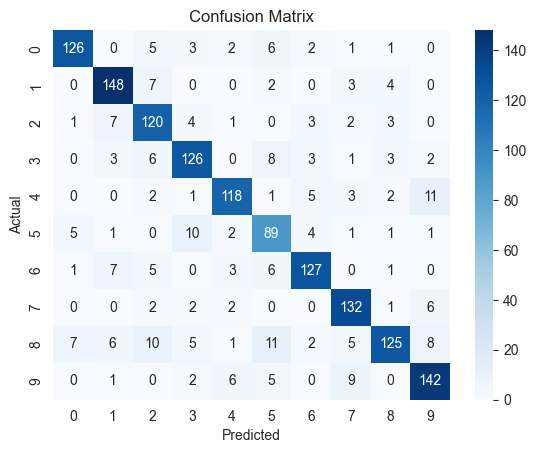

Độ chính xác trên tập train (PCA full): 0.9994
Độ chính xác trên tập validation (PCA full): 0.8353
Tổng tỷ lệ phương sai giải thích (PCA full): 0.9176
Cách 2: Chia train/validation rồi mới giảm chiều

Confusion Matrix:


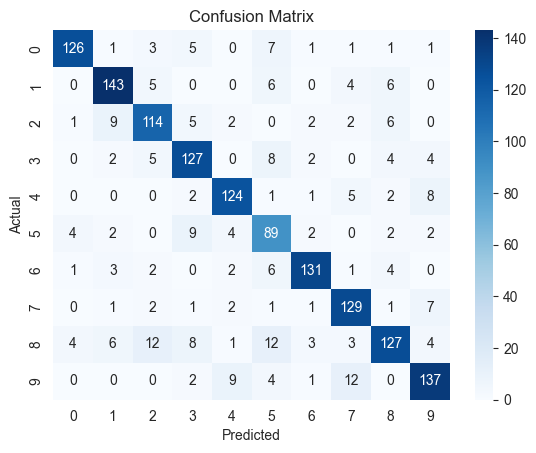

Độ chính xác trên tập train (PCA split): 0.9886
Độ chính xác trên tập validation (PCA split): 0.8313
Tổng tỷ lệ phương sai giải thích (PCA split): 0.9184
So sánh kết quả:
(a) Original (784 chiều) - Validation Accuracy: 0.8813
(b1) PCA full (100 chiều) - Validation Accuracy: 0.8353
(b2) PCA split (100 chiều) - Validation Accuracy: 0.8313


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA




print("(2) Áp dụng phương pháp phân loại nhiều lớp Multinomial Logistic Regression (tỷ lệ train:validation là 0.7:0.3).")

# 2a)
print("(a) Dữ liệu nguyên bản (giữ nguyên 28x28 = 784 chiều)")
# Chia tập train/validation với tỷ lệ 0.7:0.3
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(
    train_images, train_labels, train_size=0.7, random_state=42
)

# Huấn luyện Multinomial Logistic Regression
model_orig = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
model_orig.fit(X_train_orig, y_train_orig)

# Dự đoán và đánh giá
y_pred_train_orig = model_orig.predict(X_train_orig)
y_pred_val_orig = model_orig.predict(X_val_orig)
acc_train_orig = accuracy_score(y_train_orig, y_pred_train_orig)
acc_val_orig = accuracy_score(y_val_orig, y_pred_val_orig)

# Evaluate the model using multiple metrics
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_orig, y_pred_val_orig)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Độ chính xác trên tập train (original): {acc_train_orig:.4f}")
print(f"Độ chính xác trên tập validation (original): {acc_val_orig:.4f}")

# 2b)
print("(b) Dữ liệu đã qua giảm chiều (100 chiều) theo 02 cách: Giảm chiều toàn tập ảnh sau đó chia train:test – chia train:test rồi mới giảm chiều. So sánh và cho biết cách nào phù hợp hơn.")
print("Cách 1: Giảm chiều toàn bộ tập ảnh sau đó chia train/validation")
pca_full = PCA(n_components=100)
all_images = np.vstack((train_images, test_images))  # Gộp train và test để giảm chiều
all_images_pca = pca_full.fit_transform(all_images)


train_images_pca_full = all_images_pca[:5000, :]
test_images_pca_full = all_images_pca[5000:, :]

X_train_pca1, X_val_pca1, y_train_pca1, y_val_pca1 = train_test_split(
    train_images_pca_full, train_labels, train_size=0.7, random_state=42
)

# Huấn luyện và đánh giá
model_pca1 = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
model_pca1.fit(X_train_pca1, y_train_pca1)

y_pred_train_pca1 = model_pca1.predict(X_train_pca1)
y_pred_val_pca1 = model_pca1.predict(X_val_pca1)
acc_train_pca1 = accuracy_score(y_train_pca1, y_pred_train_pca1)
acc_val_pca1 = accuracy_score(y_val_pca1, y_pred_val_pca1)

# Evaluate the model using multiple metrics
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_pca1, y_pred_val_pca1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Độ chính xác trên tập train (PCA full): {acc_train_pca1:.4f}")
print(f"Độ chính xác trên tập validation (PCA full): {acc_val_pca1:.4f}")
print(f"Tổng tỷ lệ phương sai giải thích (PCA full): {sum(pca_full.explained_variance_ratio_):.4f}")

# Cách 2
print("Cách 2: Chia train/validation rồi mới giảm chiều")
X_train_orig2, X_val_orig2, y_train_orig2, y_val_orig2 = train_test_split(
    train_images, train_labels, train_size=0.7, random_state=42
)

# Giảm chiều riêng trên tập train
pca_train = PCA(n_components=100)
X_train_pca2 = pca_train.fit_transform(X_train_orig2)
X_val_pca2 = pca_train.transform(X_val_orig2)  # Chỉ transform trên validation

# Huấn luyện và đánh giá
model_pca2 = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
model_pca2.fit(X_train_pca2, y_train_orig2)

y_pred_train_pca2 = model_pca2.predict(X_train_pca2)
y_pred_val_pca2 = model_pca2.predict(X_val_pca2)
acc_train_pca2 = accuracy_score(y_train_orig2, y_pred_train_pca2)
acc_val_pca2 = accuracy_score(y_val_orig2, y_pred_val_pca2)

# Evaluate the model using multiple metrics
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_orig2, y_pred_val_pca2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Độ chính xác trên tập train (PCA split): {acc_train_pca2:.4f}")
print(f"Độ chính xác trên tập validation (PCA split): {acc_val_pca2:.4f}")
print(f"Tổng tỷ lệ phương sai giải thích (PCA split): {sum(pca_train.explained_variance_ratio_):.4f}")

# So sánh kết quả:
print("So sánh kết quả:")
print(f"(a) Original (784 chiều) - Validation Accuracy: {acc_val_orig:.4f}")
print(f"(b1) PCA full (100 chiều) - Validation Accuracy: {acc_val_pca1:.4f}")
print(f"(b2) PCA split (100 chiều) - Validation Accuracy: {acc_val_pca2:.4f}")

VÍ DỤ 5: BÀI TẬP THỰC HÀNH 4

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/face_data'

ids = range(1, 16) 
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink']

prefix = 'subject'
surfix = '.png'

# Mở một ảnh để lấy kích thước
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(os.path.join(path, fn), cv2.IMREAD_GRAYSCALE)
H, W = im.shape
D = H * W
N = len(states) * len(ids)

print("Số lượng ảnh:", N, "Số chiều mỗi ảnh:", D, "H:", H, "W:", W)

# Ma trận dữ liệu X (D x N)
X = np.zeros((D, N), dtype=np.float32)
y = np.zeros(N, dtype=int)

count = 0
for person_id in ids:
    for state_idx, state in enumerate(states):
        fn = os.path.join(path, f'{prefix}{str(person_id).zfill(2)}.{state}{surfix}')
        img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        X[:, count] = img.flatten()
        y[count] = person_id  # nhãn là id người
        count += 1

print("Dữ liệu đã được load xong.")


Số lượng ảnh: 165 Số chiều mỗi ảnh: 77760 H: 243 W: 320
Dữ liệu đã được load xong.


In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=135)
X_pca = pca.fit_transform(X.T) 

print("Tỷ lệ phương sai giải thích:", np.sum(pca.explained_variance_ratio_))
print("Kích thước dữ liệu sau PCA:", X_pca.shape)


Tỷ lệ phương sai giải thích: 0.9977574
Kích thước dữ liệu sau PCA: (165, 135)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, train_size=0.7, random_state=42, stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (115, 135) Test: (50, 135)


Độ chính xác train (LR): 1.0
Độ chính xác test (LR): 0.86


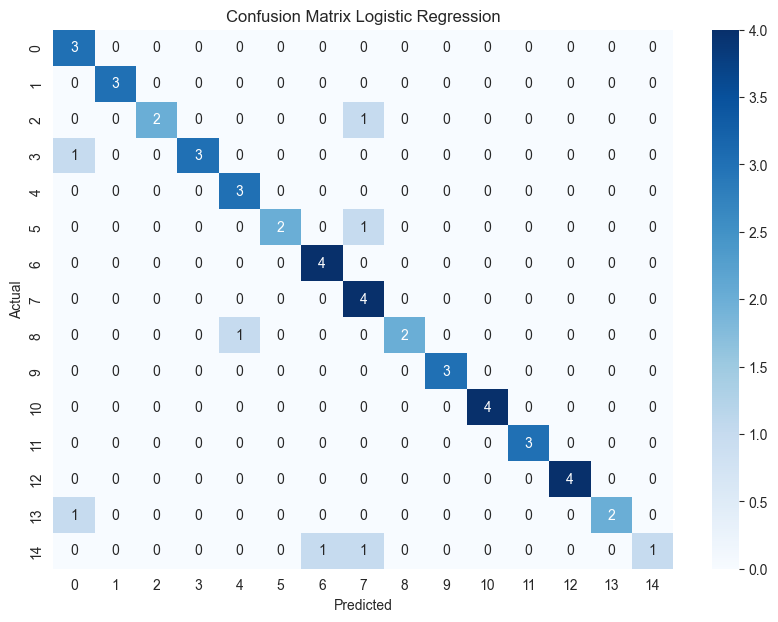

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

print("Độ chính xác train (LR):", accuracy_score(y_train, y_pred_train))
print("Độ chính xác test (LR):", accuracy_score(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()


In [71]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_train_nb = model_nb.predict(X_train)
y_pred_test_nb = model_nb.predict(X_test)

print("Độ chính xác train (NB):", accuracy_score(y_train, y_pred_train_nb))
print("Độ chính xác test (NB):", accuracy_score(y_test, y_pred_test_nb))


Độ chính xác train (NB): 1.0
Độ chính xác test (NB): 0.64


In [72]:
new_images_paths = [
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/5face_data/subject04.wink.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/5face_data/subject05.centerlight.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/5face_data/subject05.glasses.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/5face_data/subject05.happy.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab6/5face_data/subject05.leftlight.png'
]


X_new = []
for fn in new_images_paths:
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (W, H))  
    X_new.append(img_resized.flatten())

X_new = np.array(X_new)


X_new_pca = pca.transform(X_new)

y_new_pred_lr = model_lr.predict(X_new_pca)
y_new_pred_nb = model_nb.predict(X_new_pca)

print("Nhóm dự đoán Logistic Regression:", y_new_pred_lr)
print("Nhóm dự đoán Naïve Bayes:", y_new_pred_nb)


Nhóm dự đoán Logistic Regression: [4 5 5 5 5]
Nhóm dự đoán Naïve Bayes: [4 5 5 5 1]
